In [1]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet('/Users/damensavvasavvi/Desktop/Desktop - Damen’s MacBook Air (2)/AlgoTrading/feature_generation/ultimate_feature_set.parquet')

In [3]:
# Select only up to 2024 for training
data = data[[col for col in data.columns if col not in ['cdlengulfing_raw',
 'cdlhammer_raw',
 'cdlshootingstar_raw',
 'cdldoji_raw',
 'cdlpiercing_raw',
 'cdldarkcloudcover_raw',
 'cdlmorningstar_raw',
 'cdleveningstar_raw',
 'cdl3whitesoldiers_raw',
 'cdl3blackcrows_raw',
 'cdlengulfing_sign',
 'cdlhammer_sign',
 'cdlshootingstar_sign',
 'cdldoji_sign',
 'cdlpiercing_sign',
 'cdldarkcloudcover_sign',
 'cdlmorningstar_sign',
 'cdleveningstar_sign',
 'cdl3whitesoldiers_sign',
 'cdl3blackcrows_sign',
 'cdlengulfing_sign_any_w5',
 'cdlhammer_sign_any_w5',
 'cdlshootingstar_sign_any_w5',
 'cdldoji_sign_any_w5',
 'cdlpiercing_sign_any_w5',
 'cdldarkcloudcover_sign_any_w5',
 'cdlmorningstar_sign_any_w5',
 'cdleveningstar_sign_any_w5',
 'cdl3whitesoldiers_sign_any_w5',
 'cdl3blackcrows_sign_any_w5',
 'cdlengulfing_sign_count_w5',
 'cdlhammer_sign_count_w5',
 'cdlshootingstar_sign_count_w5',
 'cdldoji_sign_count_w5',
 'cdlpiercing_sign_count_w5',
 'cdldarkcloudcover_sign_count_w5',
 'cdlmorningstar_sign_count_w5',
 'cdleveningstar_sign_count_w5',
 'cdl3whitesoldiers_sign_count_w5',
 'cdl3blackcrows_sign_count_w5',
 'cdlengulfing_sign_bull_w5',
 'cdlhammer_sign_bull_w5',
 'cdlshootingstar_sign_bull_w5',
 'cdldoji_sign_bull_w5',
 'cdlpiercing_sign_bull_w5',
 'cdldarkcloudcover_sign_bull_w5',
 'cdlmorningstar_sign_bull_w5',
 'cdleveningstar_sign_bull_w5',
 'cdl3whitesoldiers_sign_bull_w5',
 'cdl3blackcrows_sign_bull_w5',
 'cdlengulfing_sign_bear_w5',
 'cdlhammer_sign_bear_w5',
 'cdlshootingstar_sign_bear_w5',
 'cdldoji_sign_bear_w5',
 'cdlpiercing_sign_bear_w5',
 'cdldarkcloudcover_sign_bear_w5',
 'cdlmorningstar_sign_bear_w5',
 'cdleveningstar_sign_bear_w5',
 'cdl3whitesoldiers_sign_bear_w5',
 'cdl3blackcrows_sign_bear_w5',
 'bull_strength_w5',
 'bear_strength_w5',
 'net_strength_w5',
 'cdlengulfing_sign_any_w10',
 'cdlhammer_sign_any_w10',
 'cdlshootingstar_sign_any_w10',
 'cdldoji_sign_any_w10',
 'cdlpiercing_sign_any_w10',
 'cdldarkcloudcover_sign_any_w10',
 'cdlmorningstar_sign_any_w10',
 'cdleveningstar_sign_any_w10',
 'cdl3whitesoldiers_sign_any_w10',
 'cdl3blackcrows_sign_any_w10',
 'cdlengulfing_sign_count_w10',
 'cdlhammer_sign_count_w10',
 'cdlshootingstar_sign_count_w10',
 'cdldoji_sign_count_w10',
 'cdlpiercing_sign_count_w10',
 'cdldarkcloudcover_sign_count_w10',
 'cdlmorningstar_sign_count_w10',
 'cdleveningstar_sign_count_w10',
 'cdl3whitesoldiers_sign_count_w10',
 'cdl3blackcrows_sign_count_w10',
 'cdlengulfing_sign_bull_w10',
 'cdlhammer_sign_bull_w10',
 'cdlshootingstar_sign_bull_w10',
 'cdldoji_sign_bull_w10',
 'cdlpiercing_sign_bull_w10',
 'cdldarkcloudcover_sign_bull_w10',
 'cdlmorningstar_sign_bull_w10',
 'cdleveningstar_sign_bull_w10',
 'cdl3whitesoldiers_sign_bull_w10',
 'cdl3blackcrows_sign_bull_w10',
 'cdlengulfing_sign_bear_w10',
 'cdlhammer_sign_bear_w10',
 'cdlshootingstar_sign_bear_w10',
 'cdldoji_sign_bear_w10',
 'cdlpiercing_sign_bear_w10',
 'cdldarkcloudcover_sign_bear_w10',
 'cdlmorningstar_sign_bear_w10',
 'cdleveningstar_sign_bear_w10',
 'cdl3whitesoldiers_sign_bear_w10',
 'cdl3blackcrows_sign_bear_w10',
 'bull_strength_w10',
 'bear_strength_w10',
 'net_strength_w10',
 'cdlengulfing_sign_any_w15',
 'cdlhammer_sign_any_w15',
 'cdlshootingstar_sign_any_w15',
 'cdldoji_sign_any_w15',
 'cdlpiercing_sign_any_w15',
 'cdldarkcloudcover_sign_any_w15',
 'cdlmorningstar_sign_any_w15',
 'cdleveningstar_sign_any_w15',
 'cdl3whitesoldiers_sign_any_w15',
 'cdl3blackcrows_sign_any_w15',
 'cdlengulfing_sign_count_w15',
 'cdlhammer_sign_count_w15',
 'cdlshootingstar_sign_count_w15',
 'cdldoji_sign_count_w15',
 'cdlpiercing_sign_count_w15',
 'cdldarkcloudcover_sign_count_w15',
 'cdlmorningstar_sign_count_w15',
 'cdleveningstar_sign_count_w15',
 'cdl3whitesoldiers_sign_count_w15',
 'cdl3blackcrows_sign_count_w15',
 'cdlengulfing_sign_bull_w15',
 'cdlhammer_sign_bull_w15',
 'cdlshootingstar_sign_bull_w15',
 'cdldoji_sign_bull_w15',
 'cdlpiercing_sign_bull_w15',
 'cdldarkcloudcover_sign_bull_w15',
 'cdlmorningstar_sign_bull_w15',
 'cdleveningstar_sign_bull_w15',
 'cdl3whitesoldiers_sign_bull_w15',
 'cdl3blackcrows_sign_bull_w15',
 'cdlengulfing_sign_bear_w15',
 'cdlhammer_sign_bear_w15',
 'cdlshootingstar_sign_bear_w15',
 'cdldoji_sign_bear_w15',
 'cdlpiercing_sign_bear_w15',
 'cdldarkcloudcover_sign_bear_w15',
 'cdlmorningstar_sign_bear_w15',
 'cdleveningstar_sign_bear_w15',
 'cdl3whitesoldiers_sign_bear_w15',
 'cdl3blackcrows_sign_bear_w15',
 'bull_strength_w15',
 'bear_strength_w15',
 'net_strength_w15',
 'cdlengulfing_sign_any_w30',
 'cdlhammer_sign_any_w30',
 'cdlshootingstar_sign_any_w30',
 'cdldoji_sign_any_w30',
 'cdlpiercing_sign_any_w30',
 'cdldarkcloudcover_sign_any_w30',
 'cdlmorningstar_sign_any_w30',
 'cdleveningstar_sign_any_w30',
 'cdl3whitesoldiers_sign_any_w30',
 'cdl3blackcrows_sign_any_w30',
 'cdlengulfing_sign_count_w30',
 'cdlhammer_sign_count_w30',
 'cdlshootingstar_sign_count_w30',
 'cdldoji_sign_count_w30',
 'cdlpiercing_sign_count_w30',
 'cdldarkcloudcover_sign_count_w30',
 'cdlmorningstar_sign_count_w30',
 'cdleveningstar_sign_count_w30',
 'cdl3whitesoldiers_sign_count_w30',
 'cdl3blackcrows_sign_count_w30',
 'cdlengulfing_sign_bull_w30',
 'cdlhammer_sign_bull_w30',
 'cdlshootingstar_sign_bull_w30',
 'cdldoji_sign_bull_w30',
 'cdlpiercing_sign_bull_w30',
 'cdldarkcloudcover_sign_bull_w30',
 'cdlmorningstar_sign_bull_w30',
 'cdleveningstar_sign_bull_w30',
 'cdl3whitesoldiers_sign_bull_w30',
 'cdl3blackcrows_sign_bull_w30',
 'cdlengulfing_sign_bear_w30',
 'cdlhammer_sign_bear_w30',
 'cdlshootingstar_sign_bear_w30',
 'cdldoji_sign_bear_w30',
 'cdlpiercing_sign_bear_w30',
 'cdldarkcloudcover_sign_bear_w30',
 'cdlmorningstar_sign_bear_w30',
 'cdleveningstar_sign_bear_w30',
 'cdl3whitesoldiers_sign_bear_w30',
 'cdl3blackcrows_sign_bear_w30',
 'bull_strength_w30',
 'bear_strength_w30',
 'net_strength_w30',
 'cdlengulfing_sign_any_w60',
 'cdlhammer_sign_any_w60',
 'cdlshootingstar_sign_any_w60',
 'cdldoji_sign_any_w60',
 'cdlpiercing_sign_any_w60',
 'cdldarkcloudcover_sign_any_w60',
 'cdlmorningstar_sign_any_w60',
 'cdleveningstar_sign_any_w60',
 'cdl3whitesoldiers_sign_any_w60',
 'cdl3blackcrows_sign_any_w60',
 'cdlengulfing_sign_count_w60',
 'cdlhammer_sign_count_w60',
 'cdlshootingstar_sign_count_w60',
 'cdldoji_sign_count_w60',
 'cdlpiercing_sign_count_w60',
 'cdldarkcloudcover_sign_count_w60',
 'cdlmorningstar_sign_count_w60',
 'cdleveningstar_sign_count_w60',
 'cdl3whitesoldiers_sign_count_w60',
 'cdl3blackcrows_sign_count_w60',
 'cdlengulfing_sign_bull_w60',
 'cdlhammer_sign_bull_w60',
 'cdlshootingstar_sign_bull_w60',
 'cdldoji_sign_bull_w60',
 'cdlpiercing_sign_bull_w60',
 'cdldarkcloudcover_sign_bull_w60',
 'cdlmorningstar_sign_bull_w60',
 'cdleveningstar_sign_bull_w60',
 'cdl3whitesoldiers_sign_bull_w60',
 'cdl3blackcrows_sign_bull_w60',
 'cdlengulfing_sign_bear_w60',
 'cdlhammer_sign_bear_w60',
 'cdlshootingstar_sign_bear_w60',
 'cdldoji_sign_bear_w60',
 'cdlpiercing_sign_bear_w60',
 'cdldarkcloudcover_sign_bear_w60',
 'cdlmorningstar_sign_bear_w60',
 'cdleveningstar_sign_bear_w60',
 'cdl3whitesoldiers_sign_bear_w60',
 'cdl3blackcrows_sign_bear_w60',
 'bull_strength_w60',
 'bear_strength_w60',
 'net_strength_w60']]]
data = data[data.index < '2024-07-01'].copy()
returns = data['ret_1'].astype(float)

In [4]:
class SeriesSegment:
    def __init__(self,prev_segment, segment, start_timestamp, end_timestamp):
        self.prev_segment = prev_segment[[col for col in prev_segment.columns if "ret_k" not in col]].copy()
        self.segment = segment.copy()
        self.start_timestamp = start_timestamp
        self.end_timestamp = end_timestamp
        self.cumulative_return = self.get_cumulative_return()

    def get_cumulative_return(self, type='percent'):
        if type == 'percent':
            return self.segment['ret_1'].sum() * 100 
        elif type == 'absolute':
            return self.segment['ret_1'].sum()
        elif type == 'basis_points':
            return self.segment['ret_1'].sum() * 10000
    def get_segment(self):
        return self.segment
    
    def get_prev_segment(self):
        return self.prev_segment
    
    def get_segment_timedelta(self):
        return self.end_timestamp - self.start_timestamp
    def get_segment_bar_count(self):
        return len(self.segment)
    

In [5]:

def find_segments(mask: pd.Series,returns: pd.Series, min_len=10,max_length=None, prev=120) -> list[SeriesSegment]: # finds previous 2 hours of data as well
    segments = []
    m = mask.to_numpy()
    idx = returns.index
    cur_len = 0
    start_pos = None

    for i, is_true in enumerate(m):
        if is_true and cur_len == 0:
            start_pos = i
            cur_len = 1 
        elif is_true and max_length is not None and cur_len < max_length:
            cur_len += 1
        elif is_true and max_length is None:
            cur_len += 1
        else:
            if cur_len >= min_len:
                left = max(0, start_pos-prev) # if prev>start_pos, just take from 0, as in the beginning negative indexing will wrap around to the other side of data
                prev_segment = data[idx[left]:idx[start_pos]]
                segment = data[idx[start_pos]:idx[i-1]]
                series = SeriesSegment(prev_segment, segment, idx[start_pos], idx[i-1])
                segments.append(series)
            cur_len = 0
            start_pos = None

    if cur_len >= min_len:
        prev_segment = data[idx[start_pos-prev]:idx[start_pos]]
        segment = data[idx[start_pos]:idx[i-1]]
        series = SeriesSegment(prev_segment, segment, idx[start_pos], idx[len(m)-1])
        segments.append(series)

    
    return segments


### Positive and Negative Cumulative Returns Segments:

14601 14534


{'whiskers': [<matplotlib.lines.Line2D at 0x8feb40cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x8feb40f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x8feb40b90>,
 'medians': [<matplotlib.lines.Line2D at 0x8feb411d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x8feb41310>,
 'means': []}

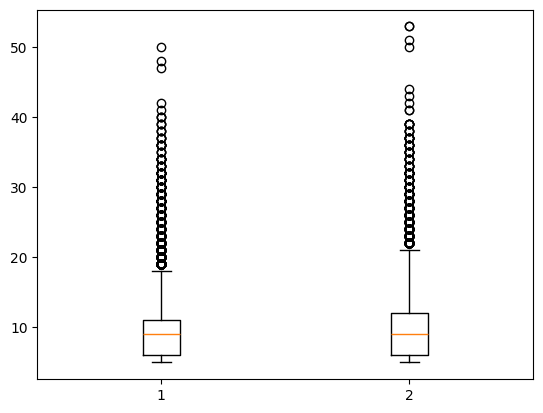

In [6]:
# stronger trend detection via cumulative return over window than requiring outright sign consistency
# Rolling 10-bar cumulative return
cumulative_returns = returns.rolling(window=10).sum()

# Directional thresholds
cutoff_pos = cumulative_returns.quantile(0.85)   # top 15% positive cumulative moves
cutoff_neg = cumulative_returns.quantile(0.15)   # bottom 15% negative cumulative moves

# Masks (NO abs() here, because we want directional thresholds)
positive_magnitude_mask = (cumulative_returns >= cutoff_pos) & cumulative_returns.notna()
negative_magnitude_mask = (cumulative_returns <= cutoff_neg) & cumulative_returns.notna()

# Find segments of persistent directional strong moves
positive_magnitude_segments = find_segments(positive_magnitude_mask, cumulative_returns, min_len=5)
negative_magnitude_segments = find_segments(negative_magnitude_mask, cumulative_returns, min_len=5)

print(len(positive_magnitude_segments), len(negative_magnitude_segments))
max_length_pos = max([seg.get_segment_bar_count() for seg in positive_magnitude_segments])
max_length_neg = max([seg.get_segment_bar_count() for seg in negative_magnitude_segments])
max_length_pos, max_length_neg
plt.boxplot([ [seg.get_segment_bar_count() for seg in positive_magnitude_segments], [seg.get_segment_bar_count() for seg in negative_magnitude_segments] ])

### Low drift segments:
#### Definition: the average or expected directional change of a return series.
- It measures the bias or trend in price movement — how much the price tends to go up or down on average.
#### Intuition
- High positive drift: sustained uptrend (price steadily rising).
- High negative drift: sustained downtrend (price steadily falling).
- Low drift: no clear directional bias — returns fluctuate around zero.

In [7]:
# Low drift segments:
low_average_returns_mask = data['ret_1_z60'].rolling(window=10).mean() <= data['ret_1_z60'].rolling(window=10).mean().quantile(0.4)
low_average_returns_segment = find_segments(low_average_returns_mask, data['ret_1_z60'], min_len=10)
len(low_average_returns_segment), low_average_returns_segment[:5]

# High positive and negative drift segments:
roll_mean = data['ret_1_z60'].rolling(window=10, min_periods=10).mean()

cutoff_pos = roll_mean.quantile(0.75)  # high positive drift
cutoff_neg = roll_mean.quantile(0.25)  # high negative drift

high_pos_drift_mask = (roll_mean >= cutoff_pos) & roll_mean.notna()
high_neg_drift_mask = (roll_mean <= cutoff_neg) & roll_mean.notna()

high_pos_drift_segments = find_segments(high_pos_drift_mask, data['ret_1_z60'], min_len=10)
high_neg_drift_segments = find_segments(high_neg_drift_mask, data['ret_1_z60'], min_len=10)

print(len(high_pos_drift_segments), len(high_neg_drift_segments))
max_length_pos_drift = max([seg.get_segment_bar_count() for seg in high_pos_drift_segments])
max_length_neg_drift = max([seg.get_segment_bar_count() for seg in high_neg_drift_segments])
max_length_pos_drift, max_length_neg_drift


11586 11581


(40, 48)

### Low volatility segments:
 
#### Volatility Definition: the dispersion or variability of returns — how much they fluctuate, regardless of direction.

- It measures uncertainty or magnitude of movement, not the sign.

#### Intuition
- High volatility: returns jump around a lot (big up/down swings).
- Low volatility: returns stay near zero (quiet, steady periods).
- Drift could be zero while volatility is huge (e.g., sharp whipsaws that net out).

In [8]:
vol_proxy = data['ret_1_z60'].abs().rolling(10, min_periods=10).mean()
low_vol_mask = (vol_proxy <= vol_proxy.quantile(0.4)) & vol_proxy.notna()
low_vol_segments = find_segments(low_vol_mask, data['ret_1_z60'], min_len=10, max_length=60)

print(len(low_vol_segments))
max_length_low_vol = max([seg.get_segment_bar_count() for seg in low_vol_segments])
max_length_low_vol


18560


60

### Order flow imbalance:
- Using features cmf_20, obv_change

In [9]:
def make_y_ofi(df: pd.DataFrame,
               cmf_col: str = "cmf_20",
               obv_z_col: str = "obv_z_200",   # prefer this (already in your DF)
               fallback_obv_change_col: str = "obv_change",
               obv_z_window: int = 2000,
               w_cmf: float = 0.7,
               w_obv: float = 0.3,
               q_lo: float = 0.33,
               q_hi: float = 0.67) -> pd.Series:
    """
    Return {-1,0,+1} order-flow imbalance label using CMF + (z-scored) OBV.
    Assumes CMF/OBV columns are already shifted(1) upstream (your code does this).
    """
    cmf = df[cmf_col].astype(float).fillna(0.0)

    if obv_z_col in df.columns:
        obv_z = df[obv_z_col].astype(float).replace([np.inf,-np.inf], 0.0).fillna(0.0)
    else:
        # Fallback: z-score obv_change to keep it commensurate with CMF
        oc = df[fallback_obv_change_col].astype(float).fillna(0.0)
        r = oc.rolling(obv_z_window, min_periods=100)
        obv_z = ((oc - r.mean()) / r.std().replace(0, np.nan)).replace([np.inf,-np.inf], 0.0).fillna(0.0)

    # Combine; CMF dominates, OBV refines
    signal = (w_cmf * cmf + w_obv * obv_z).astype(float)

    # Adaptive ternary bucketing via rolling quantiles (no look-ahead)
    lo = signal.rolling(5000, min_periods=100).quantile(q_lo)
    hi = signal.rolling(5000, min_periods=100).quantile(q_hi)

    y = np.select([signal <= lo, signal >= hi], [-1, +1], default=0)
    return pd.Series(y, index=df.index, name="y_ofi").astype(int)


y_ofi = make_y_ofi(data)
# masks (assuming you've already created y_ofi in the df)

ofi_buy_mask = y_ofi.rolling(window=30, min_periods=1).sum()>20
ofi_sell_mask = y_ofi.rolling(window=30, min_periods=1).sum()<=-20

# choose a returns series for segment stats (same as in your nb: ret_1_z60 or use ret_k15)
ret_for_eval = data["ret_1_z60"]

# persistence thresholds (minutes if your bars are 1-min)
ofi_min_len = 10   # 10+ bars to call it a persistent flow regime

ofi_buy_segments  = find_segments(ofi_buy_mask,  ret_for_eval, min_len=ofi_min_len, max_length=60)
ofi_sell_segments = find_segments(ofi_sell_mask, ret_for_eval, min_len=ofi_min_len, max_length=60)

print(len(ofi_buy_segments), len(ofi_sell_segments))
ofi_buy_segments[:5], ofi_sell_segments[:5]
# print max segment length
max_buy_length = max([seg.get_segment_bar_count() for seg in ofi_buy_segments])
max_sell_length = max([seg.get_segment_bar_count() for seg in ofi_sell_segments
])
max_buy_length, max_sell_length

7697 7927


(60, 60)

### Liquidity Regime
- feature: vol_z_60

In [10]:
vz = data["vol_z_60"]

liq_high_mask = vz.rolling(window=10, min_periods=10).mean() >= 0.8
liq_low_mask  = vz.rolling(window=10, min_periods=10).mean() <= -0.8

liq_high_segments = find_segments(liq_high_mask, data["ret_1_z60"], min_len=10, max_length=None)
liq_low_segments  = find_segments(liq_low_mask,  data["ret_1_z60"], min_len=10, max_length=None)

len(liq_high_segments), len(liq_low_segments)
max_length_liq_high = max([seg.get_segment_bar_count() for seg in liq_high_segments])
max_length_liq_low  = max([seg.get_segment_bar_count() for seg in liq_low_segments])
max_length_liq_high, max_length_liq_low 


(60, 45)

### Volume Profile Market Structure

In [11]:
# vp_vpoc_dist_atr_40_w10 = “Volatility-adjusted distance from fair value”.

# --- minimal labels (use the location code directly) ---
def make_y_ms(df: pd.DataFrame) -> pd.Series:
    # -1 below VA, 0 inside VA, +1 above VA (40% VA, w10)
    return df["vp_loc_40_w10"].astype("int8").rename("y_ms")

# --- minimal, meaningful masks ---
def build_ms_masks(df: pd.DataFrame,
                   dist_th: float = 0.5,   # >= 0.5 ATR away from VPOC
                   persist: int = 3):      # need last N bars to agree
    y_ms = make_y_ms(df)

    far  = df["vp_vpoc_dist_atr_40_w10"].abs() >= dist_th

    # require last `persist` bars to be True (clean persistence)
    def _persist(b: pd.Series, n: int) -> pd.Series:
        return (b.rolling(n, min_periods=n).mean() == 1.0)

    mask_above  = _persist((y_ms ==  1) & far, persist)
    mask_below  = _persist((y_ms == -1) & far, persist)
    mask_inside = _persist((y_ms ==  0),      persist)  # no distance gate for balance

    return y_ms, mask_above, mask_below, mask_inside

# --- usage ---
y_ms, mask_above, mask_below, mask_inside = build_ms_masks(data, dist_th=0.5, persist=3)

ms_above_segments  = find_segments(mask_above,  data["ret_1_z60"], min_len=8, max_length=60)
ms_below_segments  = find_segments(mask_below,  data["ret_1_z60"], min_len=8, max_length=60)
ms_inside_segments = find_segments(mask_inside, data["ret_1_z60"], min_len=13, max_length=60)

print(len(ms_above_segments), len(ms_below_segments), len(ms_inside_segments))
max_above_length = max([seg.get_segment_bar_count() for seg in ms_above_segments])
max_below_length = max([seg.get_segment_bar_count() for seg in ms_below_segments])
max_inside_length = max([seg.get_segment_bar_count() for seg in ms_inside_segments])
max_above_length, max_below_length, max_inside_length       




11401 11132 11251


(38, 43, 58)

### All Segments

In [12]:
# ==============================================
# Segment Collections
# ==============================================

segments = {

    # --- Trend / Directional Strength Segments ---
    # Segments of strong persistent directional moves in cumulative return
    "positive_magnitude": positive_magnitude_segments,  # sustained upside runs (top 15% cumret)
    "negative_magnitude": negative_magnitude_segments,  # sustained downside runs (bottom 15% cumret)

    # --- Drift Regimes ---
    # Drift = average directional bias in returns (positive, negative, or low)
    "high_pos_drift": high_pos_drift_segments,  # strong consistent upward drift
    "high_neg_drift": high_neg_drift_segments,  # strong consistent downward drift
    "low_drift": low_average_returns_segment,   # flat or neutral drift (mean near zero)

    # --- Volatility Regimes ---
    # Volatility = dispersion of returns regardless of sign
    "low_vol": low_vol_segments,                # quiet periods, low absolute return variation

    # --- Order Flow Imbalance (OFI) Regimes ---
    # Derived from CMF + OBV z-scores; captures sustained buying/selling pressure
    "ofi_buy": ofi_buy_segments,                # persistent buyer dominance (positive OFI)
    "ofi_sell": ofi_sell_segments,              # persistent seller dominance (negative OFI)

    # --- Liquidity Regimes ---
    # Based on rolling mean of z-scored volume (vol_z_60)
    "liq_high": liq_high_segments,              # high liquidity: active, deep market
    "liq_low": liq_low_segments,                # low liquidity: thin, slow market

    # --- Market Structure (Volume Profile Location) ---
    # Based on distance from VPOC (fair value zone)
    "ms_above": ms_above_segments,              # trading above value area (upper tail)
    "ms_below": ms_below_segments,              # trading below value area (lower tail)
    "ms_inside": ms_inside_segments,            # balanced region within value area
}

# You can now iterate through them, e.g.:
# for name, seg_list in segments.items():
#     print(f"{name}: {len(seg_list)} segments")


In [13]:
for key,item in segments.items():
    print(f"{key}: {len(item)} segments")
    print(f"  Max segment length (bars): {max([seg.get_segment_bar_count() for seg in item])}")
    print(f"  Min segment length (bars): {min([seg.get_segment_bar_count() for seg in item])}")
    print(f"  Shape of prev segment: {item[0].get_prev_segment().shape if len(item)>0 else 'N/A'}")
    print(f"  Shape of next segment: {item[0].get_next_segment().shape if len(item)>0 else 'N/A'}")

positive_magnitude: 14601 segments
  Max segment length (bars): 50
  Min segment length (bars): 5
  Shape of prev segment: (121, 444)


AttributeError: 'SeriesSegment' object has no attribute 'get_next_segment'